Titanic - Machine Learning from Disaster 필사

Source : https://www.kaggle.com/ash316/eda-to-prediction-dietanic

# EDA 진행

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data=pd.read_csv('train.csv')

## 데이터 확인하기

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Age, Cabin, Embarked 컬럼에서 결측치 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 생존자, 사망자 비율 및 인원수 확인

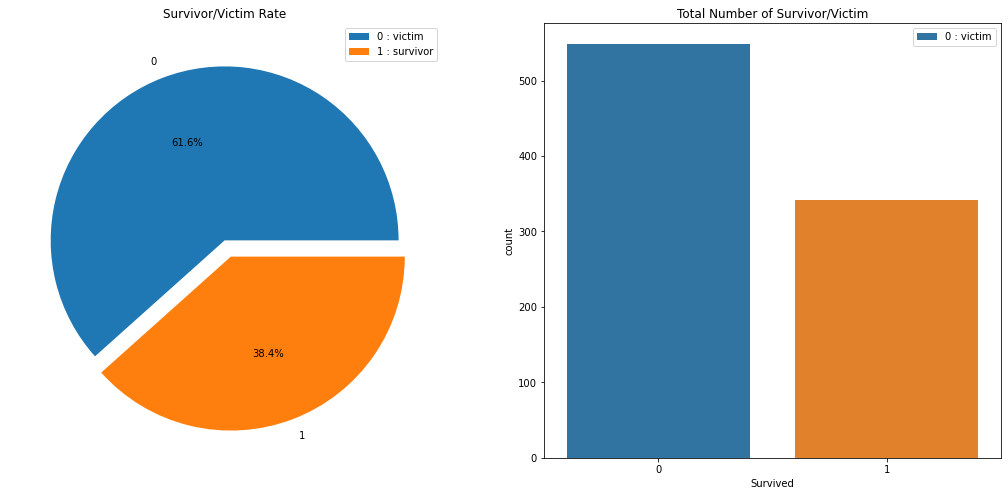

In [8]:
# 2개 plot 그리기
f, ax = plt.subplots(1, 2, figsize = (18,8))

# plot 1 : 전체 생존자, 사망자 비율
data['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%.1f%%', ax = ax[0])
ax[0].set_title('Survivor/Victim Rate')
ax[0].set_ylabel('')
ax[0].legend(['0 : victim', '1 : survivor'])

# plot 2 : 전체 생존자, 사망자 수
g = sns.countplot(x = 'Survived', data = data, ax = ax[1], )
ax[1].set_title('Total Number of Survivor/Victim')
ax[1].legend(['0 : victim', '1 : survivor'])

# 그래프 출력 (%matplotlib inline 해놓으면 plt.show() 없이도 출력)
plt.show()

## 변수 분석

* 명목형 변수 (categorical features) : Sex, Embarked
* 순서형/범주형 변수 (ordinal features) : PClass, SibSp, parch
* 연속형 변수 (continuous features) : Age, Fare
* 목표변수 (target) : Survived

* survival: Survival (0 = No, 1 = Yes)
* pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* sex: Sex	
* Age: Age in years	
* sibsp: # of siblings / spouses aboard the Titanic	
* parch: # of parents / children aboard the Titanic	
* ticket: Ticket number	
* fare: Passenger fare
* cabin: Cabin number	
* embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Sex (Categorical Feature)

In [9]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [10]:
# 성별에 따른 생존율 확인
data[['Sex','Survived']].groupby(['Sex']).mean().sort_values('Sex', ascending = False)

,Survived
Sex,
male,0.188908
female,0.742038


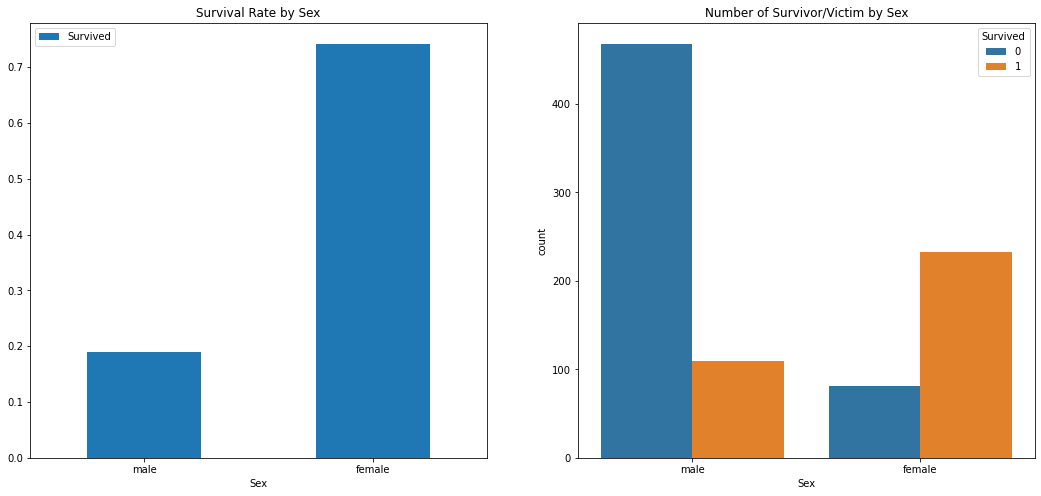

In [11]:
# 2개 plot 그리기
f,ax = plt.subplots(1, 2, figsize=(18,8))

# plot 1 : 성별에 따른 생존 비율
data[['Sex','Survived']].groupby(['Sex']).mean().sort_values('Sex', ascending = False).plot.bar(ax=ax[0], rot = 0)
ax[0].set_title('Survival Rate by Sex')

# plot 1 : Survivor/Victim Number
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Number of Survivor/Victim by Sex')

# 그래프 출력
plt.show()

# 여성의 생존율이 높음을 확인

### Pclass (Ordinal Feature)

In [12]:
# Pclass에 따른 Survived 분포 확인
# margins = True는 합계 계산해줌
pd.crosstab(index = data.Pclass, columns = data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


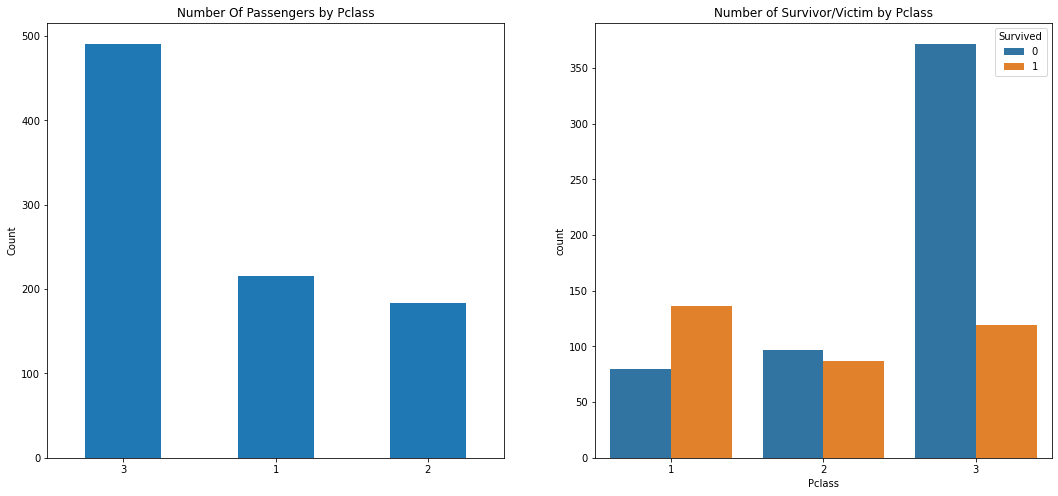

In [13]:
# 1>2>3등칸 순으로 생존율이 높음을 확인
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(ax=ax[0], rot=0)
ax[0].set_title('Number Of Passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Number of Survivor/Victim by Pclass')
plt.show()

In [14]:
# Pclass, Sex에 따른 Survived 분포 확인
pd.crosstab(index = [data.Sex,data.Survived],
            columns = data.Pclass,
            margins=True).style.background_gradient(cmap='summer_r')

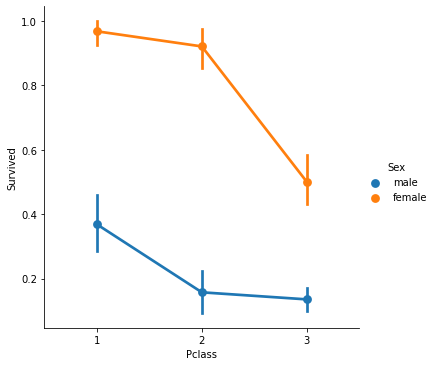

In [15]:
# 전체적으로는 1>2>3등칸 순으로 생존율이 높으나 
# 성별로 구분시 1등급 남성 생존율이 3등급 여성 생존율보다 낮음을 확인
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = data)
plt.show()

### Age (Continous Feature)

In [16]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


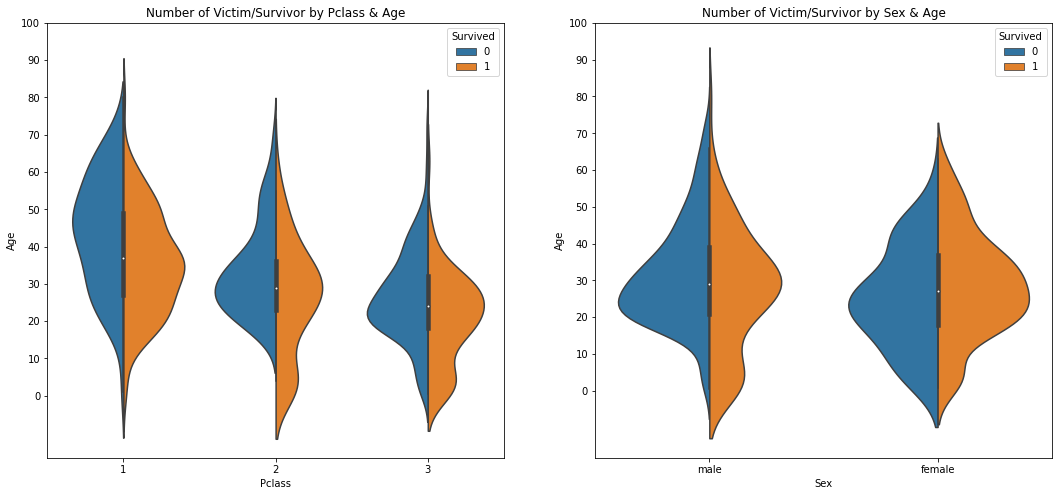

In [17]:
# 10세 이하 아이들의 생존율이 높음을 확인
# split = True로 설정시 두 카테고리에 대한 정보를 한쪽씩 바이올린플랏에 그림
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Number of Victim/Survivor by Pclass & Age')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Number of Victim/Survivor by Sex & Age')
ax[1].set_yticks(range(0,110,10))
plt.show()

<b> EDA를 통한 발견</b>
- 3등급으로 갈수록 10세 이하 어린이가 많아지며, 등급에 관계없이 어린이 생존율은 높음
- 1등급칸, 여성의 생존율이 높음
- 남성의 경우 연령이 증가할수록 생존율이 급격히 떨어짐

### 결측치 처리

In [18]:
# Age 변수 결측치 처리를 위해 Names 컬럼에서 '.' 앞의 텍스트 가져오기 (ex. 'Mrs'.)
data['Title']=0
for i in data:
    data['Title']=data.Name.str.extract('([A-Za-z]+)\.')

In [19]:
# Names 컬럼에 존재하는 Title 확인
pd.crosstab(index = data.Sex,
            columns = data.Title, margins = True).style.background_gradient(cmap='summer_r')

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [20]:
# Title 표기 통일
data['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [21]:
# Title별 평균 나이 확인
data.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [22]:
# Title별 각각 계산된 평균 나이로 대체
data.loc[(data.Age.isnull())&(data.Title=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Title=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Title=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Title=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Title=='Other'),'Age']=46

In [23]:
data.Age.isnull().any()

False

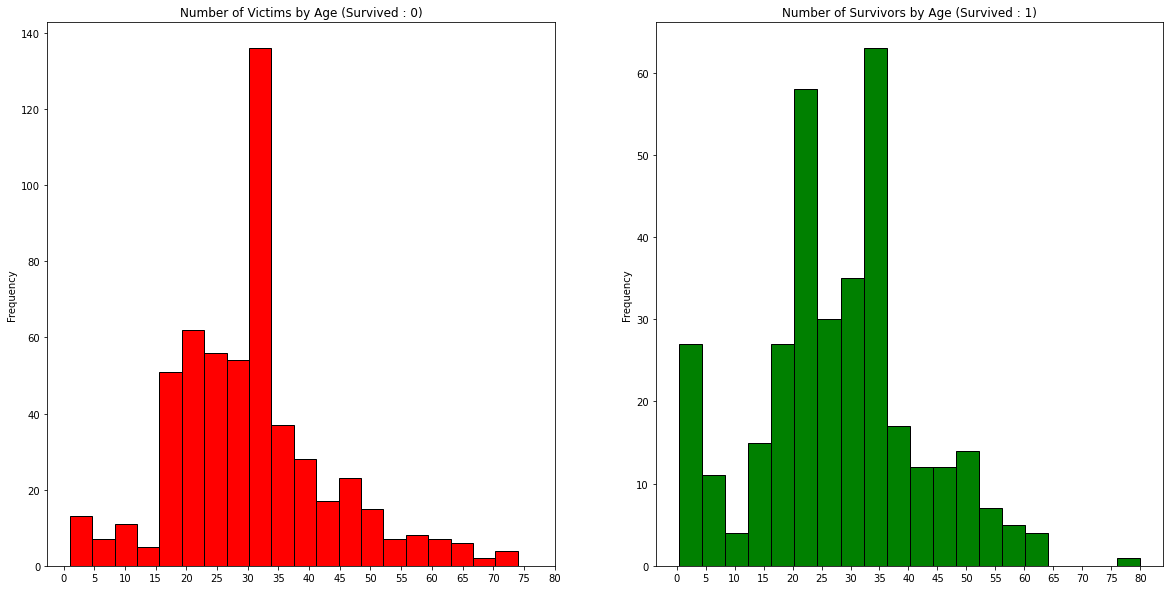

In [30]:
# 연령별 사망자, 생존자 막대그래프로 그리기
f, ax = plt.subplots(1, 2, figsize = (20, 10))
data[data['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')
ax[0].set_title('Number of Victims by Age (Survived : 0)')
t = list(range(0, 85, 5))
ax[0].set_xticks(t)

data[data['Survived'] == 1].Age.plot.hist(ax = ax[1], bins = 20, edgecolor = 'black', color = 'green')
ax[1].set_title('Number of Survivors by Age (Survived : 1)')
ax[1].set_xticks(t)

plt.show()

<b> 결측치 처리를 통한 발견</b>
- 5세 미만 유아의 생존율이 높음
- 최고령자(80세) 생존
- 사망자 수가 가장 많은 연령대는 30대

### Embarked (categorical feature)

In [32]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived],
            margins = True).style.background_gradient(cmap = 'summer_r')

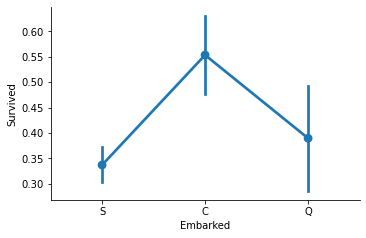

In [36]:
# 출발지에 따른 생존율 확인 -> Port C에서 출발한 탑승객 생존율이 상대적으로 높음
sns.factorplot(x = 'Embarked', y = 'Survived', data = data)
fig = plt.gcf()
fig.set_size_inches(5, 3)

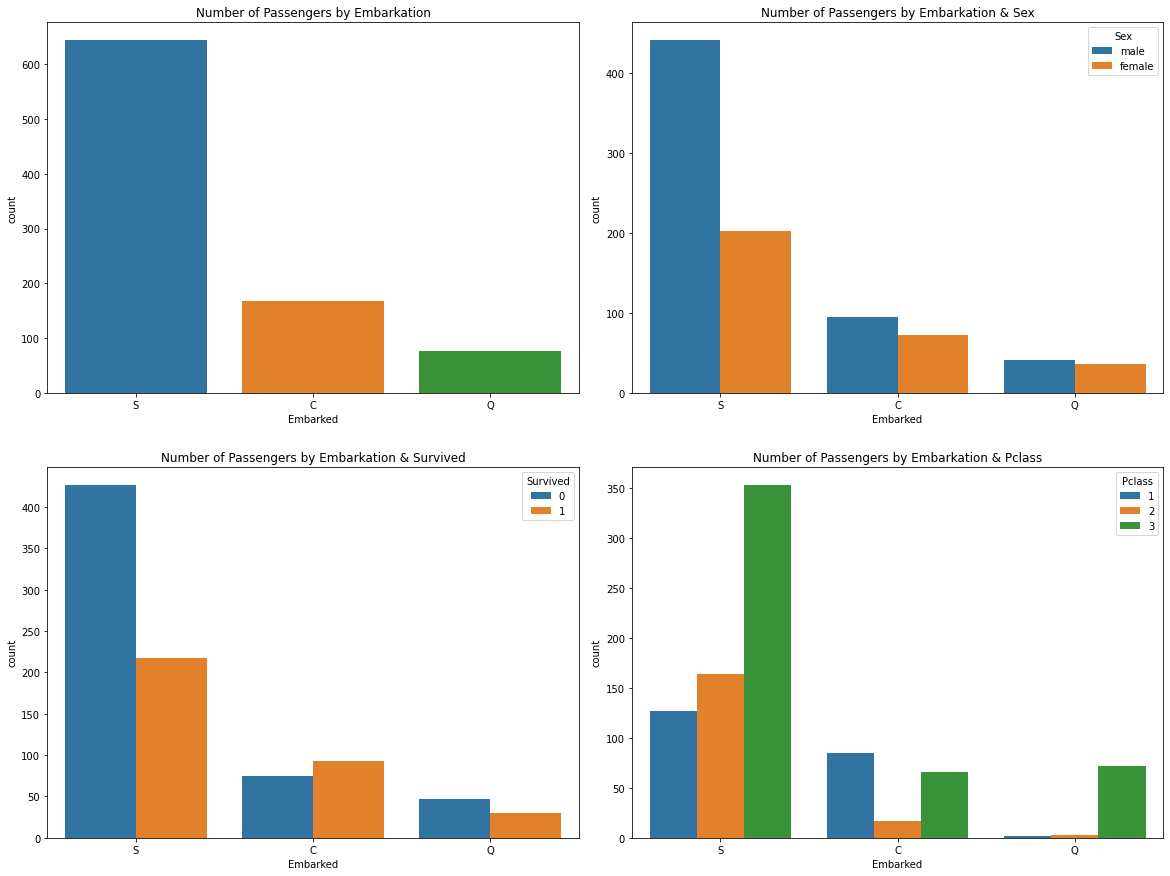

In [42]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = data, ax = ax[0, 0])
ax[0,0].set_title('Number of Passengers by Embarkation')

sns.countplot('Embarked', hue = 'Sex', data = data, ax = ax[0, 1])
ax[0,1].set_title('Number of Passengers by Embarkation & Sex')

sns.countplot('Embarked', hue = 'Survived', data = data, ax = ax[1, 0])
ax[1,0].set_title('Number of Passengers by Embarkation & Survived')

sns.countplot('Embarked', hue = 'Pclass', data = data, ax = ax[1,1])
ax[1,1].set_title('Number of Passengers by Embarkation & Pclass')

plt.subplots_adjust(wspace=0.1,hspace=0.2)
plt.show()

- Port S에서 탑승한 인원이 가장 많고, 그 중에서는 3등칸 탑승객이 가장 많음
- Port C에서 탑승한 인원의 생존율이 다른 도시에 비해 상대적으로 높은데, 1,2등칸 탑승객 비율이 높았기 때문인 것으로 보임
- Port S에서 탑승한 인원 중에는 1,2등칸 탑승객도 많지만 3등칸 탑승객도 많아, 생존율은 높지 않음
- Port Q 탑승 인원 중에는 95%가 3등칸 이용

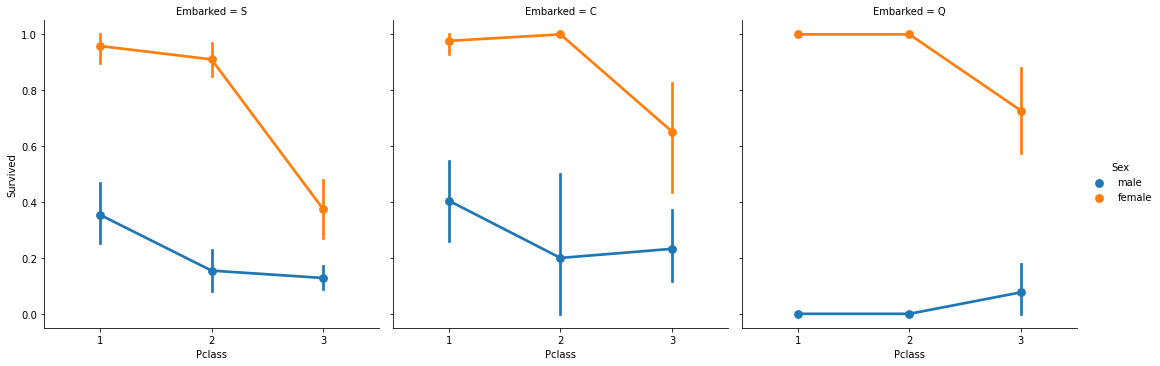

In [47]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = data)
plt.show()

- Port S의 3등칸 탑승객 생존율은 남녀 불문 낮음

In [49]:
# Embarked 컬럼 결측치 확인
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [51]:
# 결측치 2건 모두 여성으로 확인되므로, 여성 탑승자가 가장 많은 Port S로 대체
data['Embarked'].fillna('S', inplace = True)

In [52]:
data.Embarked.isnull().any()

False

### SibSp (Discrete Feature)

In [66]:
# 형제자매, 부부 탑승여부에 따른 생존여부 확인
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0.5, 1.0, 'Percentage of Survivor by SibSp')

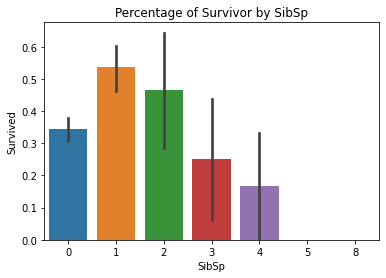

In [70]:
sns.barplot(x = 'SibSp', y = 'Survived', data = data).set_title('Percentage of Survivor by SibSp')

In [71]:
# SibSp & Pclass 분포 확인
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 형제자매, 부부가 함께 탑승하지 않은 경우 약 35%의 생존율을 보임
- 형제자매, 부부 중 1인이 함께 탑승한 경우 생존율은 약 55%로 높아지며 동승인원이 많아질수록 생존율은 낮아지는 모습을 보임
- 4인 이상 가족이 함께 탑승한 경우는 모두 3등칸을 이용했으며 여기에서 가족 동승인원 수에 따른 생존율 차이가 발생한 것으로 보임

### Parch (Discrete Feature)

In [72]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Text(0.5, 1.0, 'Percentage of Survivor by Parch')

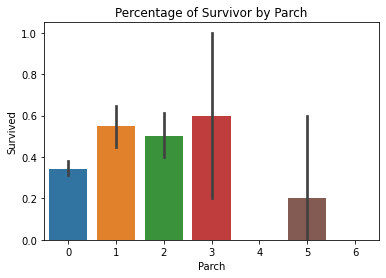

In [73]:
sns.barplot(x = 'Parch', y = 'Survived', data = data).set_title('Percentage of Survivor by Parch')

- SibSp와 마찬가지로 혼자 탑승했을 때보다 동승한 가족(부모, 자식) 인원수가 많았을 때 생존율이 높은 경향을 보임

### Fare (Continuous Feature)

In [74]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


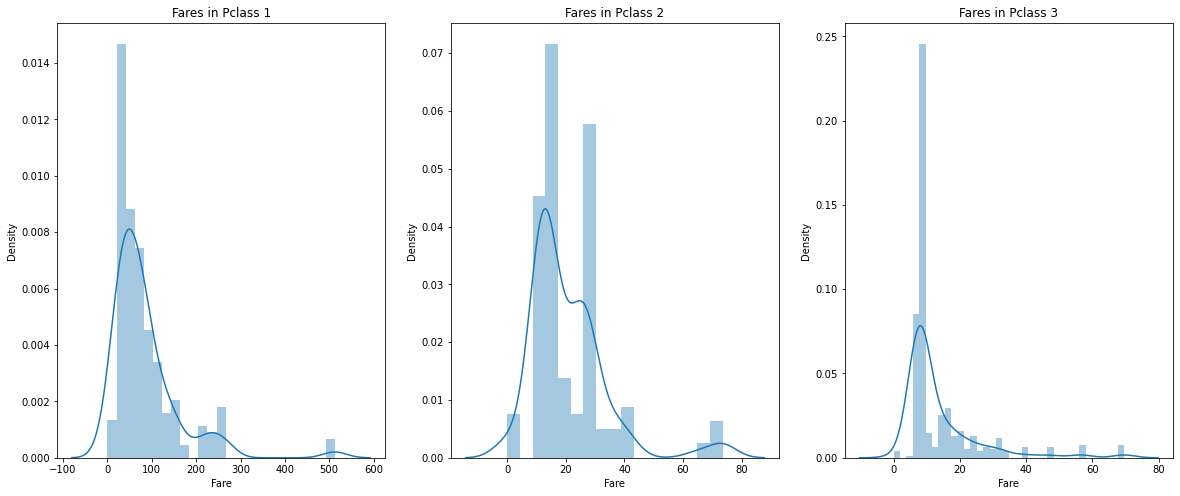

In [78]:
# Pclass별 요금 확인
f,ax = plt.subplots(1, 3, figsize = (20,8))
sns.distplot(data[data['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

- 1등칸 탑승객의 요금 범위가 2,3등칸에 비해 넓은 것으로 확인

### 변수 EDA 결과 요약
- Sex : 여성 생존율이 남성보다 높음
- Pclass : 1등칸 탑승객 생존율이 가장 높고 3등칸으로 갈수록 낮아짐
- Age : 10세 미만 어린이의 생존율은 높은 편이며 사망자는 10~30대에 많이 분포하고 있음
- Embarked : Port C 탑승객의 생존율이 높았으며, Port Q 탑승객 (대다수가 3등칸 이용) 생존율이 낮았음
- SibSp, Parch : SibSp 1~2명, Parch 1~3명과 함께 탑승한 인원의 생존율이 높았음

### 변수 간 상관관계

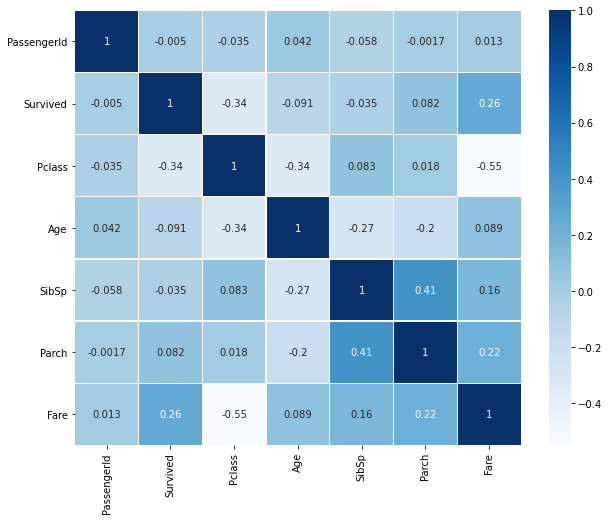

In [85]:
sns.heatmap(data.corr(), annot = True, cmap = 'Blues', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)